In [1]:
import json
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.listdir('/content/gdrive/MyDrive/Covid_Project/Data/Raw_Data')

['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_vaccine_global.csv',
 'time_series_covid19_deaths_global.csv',
 'URLs_for_data.txt']

In [4]:
covid_confirmed_csv = '/content/gdrive/MyDrive/Covid_Project/Data/Raw_Data/time_series_covid19_confirmed_global.csv'

In [5]:
covid_confirmed_df = pd.read_csv(covid_confirmed_csv)

In [6]:
covid_confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291,151563,151770
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487,134761,135140
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191,185042,185902
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891,14908,14924
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998,44174,44328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756,189066,193381,205656,215560,224894,232937,241543,246568,255748
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404,317534,317703,317703,317999,317999,318181,318435,319223,319646
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096,7104,7131,7131,7165,7187,7198,7213,7233,7256
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
# Deleting unnecessary columns.
covid_confirmed_df.drop(['Province/State', 'Lat', 'Long'], inplace=True, axis=1)
covid_confirmed_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291,151563,151770
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487,134761,135140
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191,185042,185902
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891,14908,14924
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998,44174,44328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756,189066,193381,205656,215560,224894,232937,241543,246568,255748
275,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404,317534,317703,317703,317999,317999,318181,318435,319223,319646
276,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096,7104,7131,7131,7165,7187,7198,7213,7233,7256
277,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,184672,185649,186279,187602,

In [8]:
# Let's add the numbers for countries where data is for each region and not for full coutry. Example - Australia.
covid_confirmed_df = covid_confirmed_df.groupby('Country/Region', as_index=True).sum()

In [9]:
countries_in_df_confirmed = list(covid_confirmed_df.index)

# Clean the data

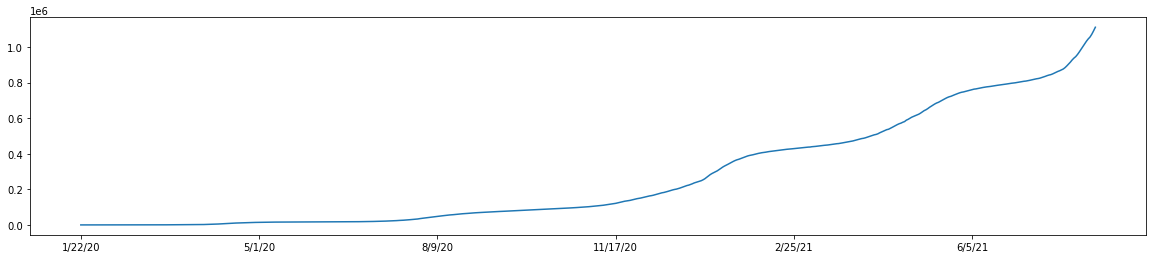

In [10]:
# Let's see data from Japan.
covid_confirmed_df.loc['Japan'].plot(figsize=(20, 4))

In [11]:
# Changing from cumulative cases to daily cases. 
covid_confirmed_df = covid_confirmed_df.diff(periods=1, axis=1)
# Deleting NaN data.
covid_confirmed_df.drop('1/22/20', inplace=True, axis=1)

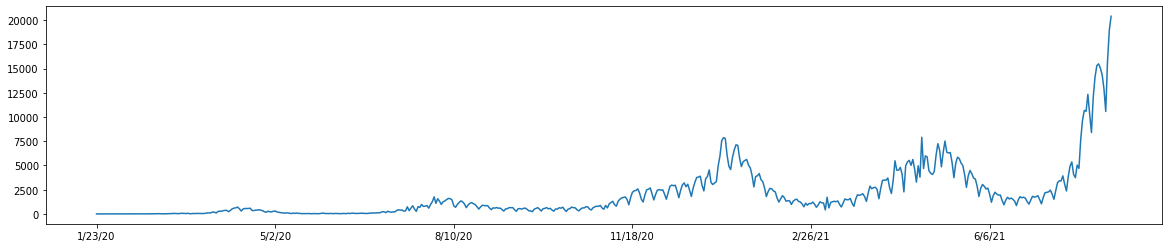

In [12]:
covid_confirmed_df.loc['Japan'].plot(figsize=(20, 4))

In [13]:
# Countries with days with reported negative number of cases.
covid_confirmed_df[(covid_confirmed_df < 0).any(axis=1)]

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,8.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,8.0,9.0,8.0,0.0,10.0,10.0,0.0,24.0,0.0,0.0
Benin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,0.0,0.0,0.0,0.0,0.0,457.0,0.0,0.0,0.0
China,95.0,277.0,486.0,669.0,802.0,2632.0,578.0,2054.0,1661.0,2089.0,4739.0,3086.0,3991.0,3733.0,3147.0,3523.0,2704.0,3015.0,2525.0,2032.0,373.0,15136.0,6463.0,2055.0,2100.0,1921.0,1777.0,408.0,458.0,473.0,1451.0,21.0,219.0,513.0,412.0,434.0,328.0,428.0,576.0,204.0,...,24.0,58.0,18.0,26.0,27.0,1.0,52.0,29.0,25.0,31.0,36.0,31.0,33.0,33.0,65.0,7.0,78.0,49.0,74.0,-1.0,80.0,71.0,87.0,50.0,68.0,55.0,77.0,99.0,93.0,104.0,87.0,130.0,109.0,103.0,127.0,145.0,115.0,82.0,104.0,71.0
Cote d'Ivoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,54.0,59.0,46.0,37.0,0.0,0.0,93.0,34.0,56.0,40.0,70.0,56.0,71.0,23.0,69.0,0.0,98.0,87.0,81.0,38.0,55.0,52.0,76.0,136.0,93.0,131.0,143.0,63.0,158.0,151.0,243.0,135.0,170.0,182.0,19.0,149.0,184.0,194.0,210.0
Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,787.0,827.0,952.0,993.0,882.0,960.0,849.0,832.0,1081.0,1120.0,1152.0,953.0,928.0,858.0,1056.0,995.0,1014.0,1046.0,895.0,789.0,727.0,851.0,791.0,769.0,655.0,635.0,0.0,804.0,493.0,598.0,575.0,580.0,525.0,599.0,389.0,446.0,573.0,484.0,402.0,419.0
Czechia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,105.0,130.0,107.0,342.0,272.0,291.0,169.0,145.0,249.0,328.0,275.0,235.0,240.0,204.0,118.0,227.0,313.0,248.0,207.0,200.0,69.0,138.0,217.0,253.0,202.0,210.0,147.0,118.0,75.0,157.0,257.0,227.0,167.0,149.0,180.0,104.0,169.0,271.0,225.0,193.0
Denmark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,341.0,551.0,699.0,672.0,559.0,541.0,635.0,860.0,1075.0,1210.0,1148.0,973.0,1040.0,651.0,855.0,830.0,859.0,815.0,708.0,765.0,647.0,772.0,568.0,1301.0,857.0,1088.0,741.0,898.0,785.0,820.0,932.0,948.0,874.0,954.0,828.0,942.0,1009.0,1176.0,1105.0,1056.0
Ecuador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,507.0,1302.0,1078.0,849.0,1195.0,903.0,370.0,68.0,2468.0,875.0,965.0,925.0,1568.0,850.0,247.0,1634.0,669.0,1169.0,936.0,0.0,0.0,0.0,0.0,0.0,4953.0,871.0,828.0,226.0,0.0,104.0,1387.0,1267.0,829.0,0.0,646.0,0.0,0.0,0.0,1936.0,0.0
El Salvador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

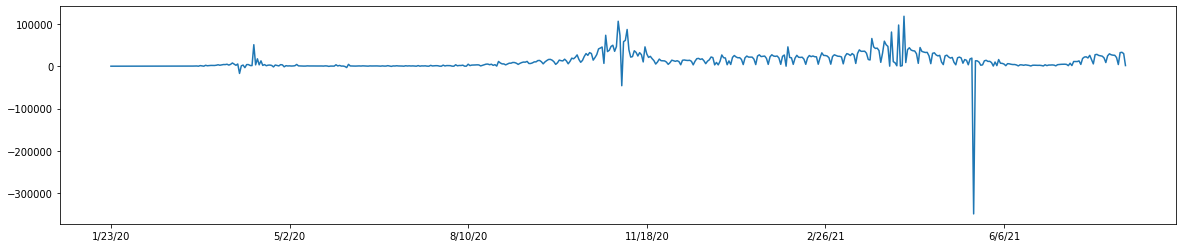

In [14]:
# Let's check for France.
covid_confirmed_df.loc['France'].plot(figsize=(20, 4))

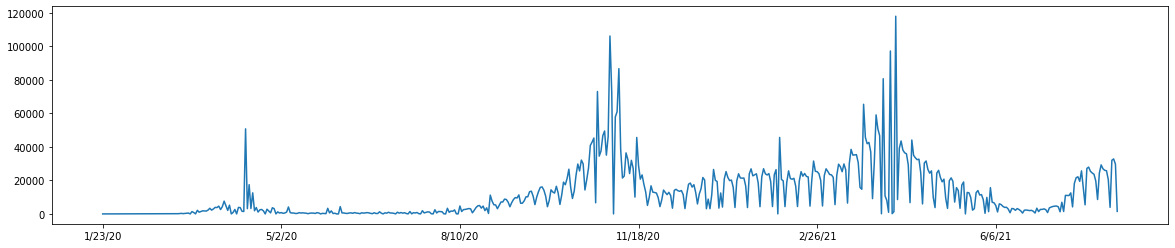

In [15]:
# Replacing negative data with 0.
covid_confirmed_df[(covid_confirmed_df < 0)] = 0
covid_confirmed_df.loc['France'].plot(figsize=(20, 4))

In [16]:
covid_confirmed_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

## Let's delete outlier points.




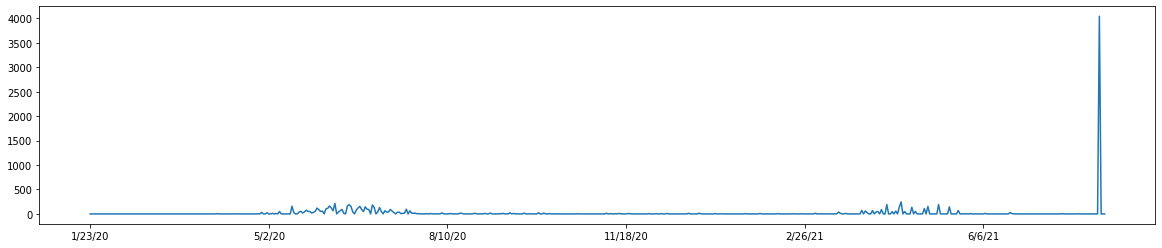

In [17]:
covid_confirmed_df.loc['Central African Republic'].plot(figsize=(20, 4))

In [18]:
covid_confirmed_df.loc['Central African Republic', covid_confirmed_df.loc['Central African Republic'] > 500] = covid_confirmed_df.loc['Central African Republic', '8/9/21']

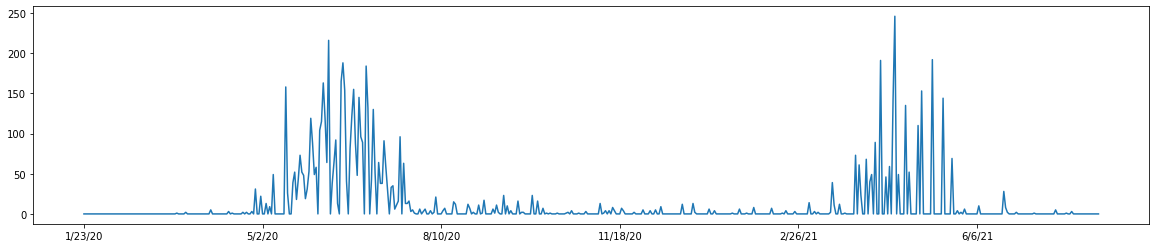

In [19]:
covid_confirmed_df.loc['Central African Republic'].plot(figsize=(20, 4))

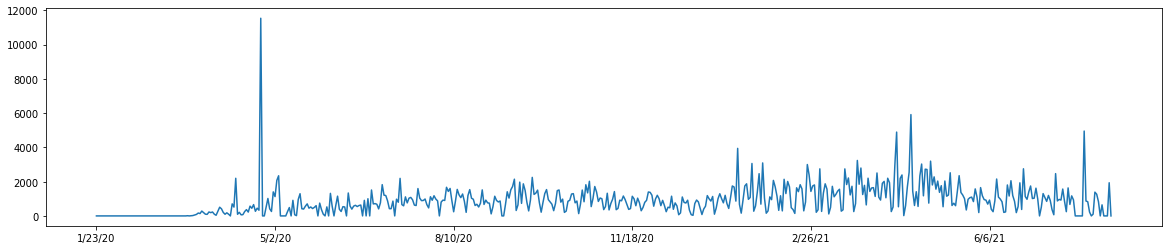

In [20]:
covid_confirmed_df.loc['Ecuador'].plot(figsize=(20, 4))

In [21]:
covid_confirmed_df.loc['Ecuador', covid_confirmed_df.loc['Ecuador'] > 10000]

4/24/20    11536.0
Name: Ecuador, dtype: float64

In [22]:
covid_confirmed_df.loc['Ecuador', '4/24/20'] = covid_confirmed_df.loc['Ecuador', '4/23/20']

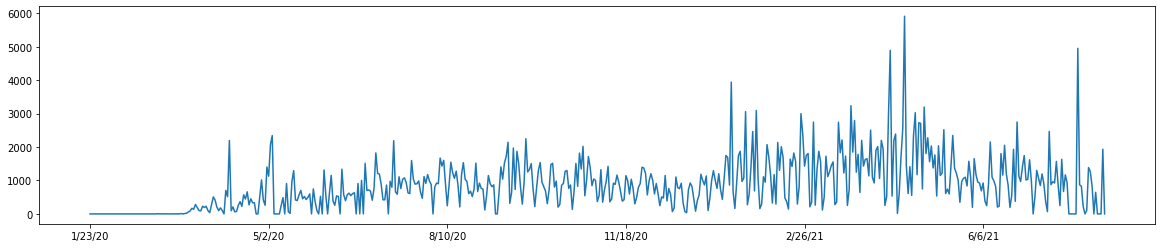

In [23]:
covid_confirmed_df.loc['Ecuador'].plot(figsize=(20, 4))


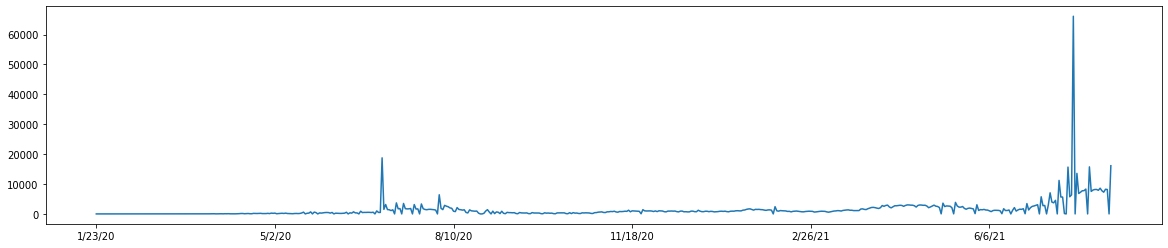

In [24]:
covid_confirmed_df.loc['Kazakhstan'].plot(figsize=(20, 4))

In [25]:
covid_confirmed_df.loc['Kazakhstan', covid_confirmed_df.loc['Kazakhstan'] > 30000]

7/23/21    66121.0
Name: Kazakhstan, dtype: float64

In [26]:
covid_confirmed_df.loc['Kazakhstan', '7/23/21'] = covid_confirmed_df.loc['Kazakhstan', '7/22/21']

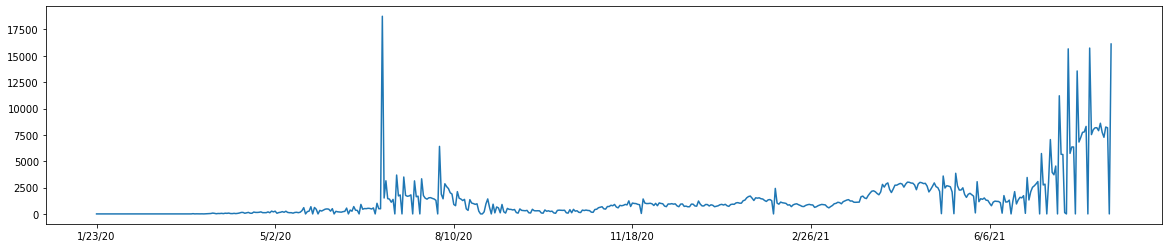

In [27]:
covid_confirmed_df.loc['Kazakhstan'].plot(figsize=(20, 4))

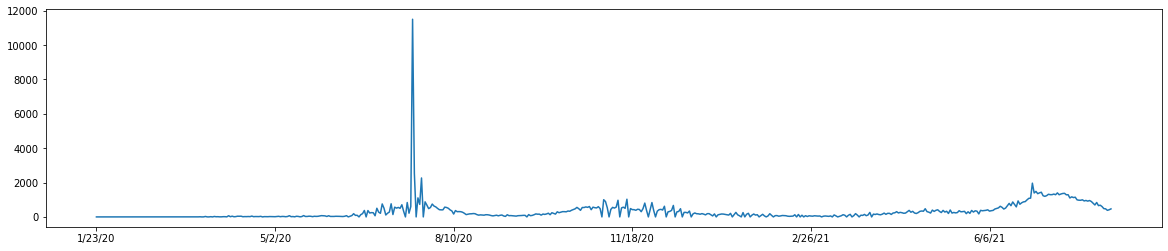

In [28]:
covid_confirmed_df.loc['Kyrgyzstan'].plot(figsize=(20, 4))

In [29]:
covid_confirmed_df.loc['Kyrgyzstan', covid_confirmed_df.loc['Kyrgyzstan'] > 10000]

7/18/20    11505.0
Name: Kyrgyzstan, dtype: float64

In [30]:
covid_confirmed_df.loc['Kyrgyzstan','7/18/20'] = covid_confirmed_df.loc['Kyrgyzstan','7/17/20']

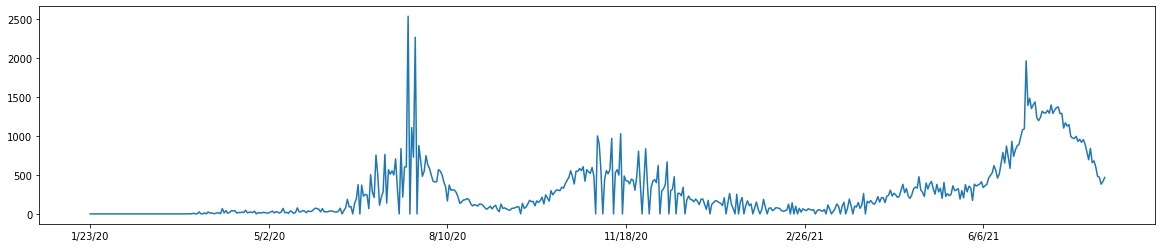

In [31]:
covid_confirmed_df.loc['Kyrgyzstan'].plot(figsize=(20, 4))

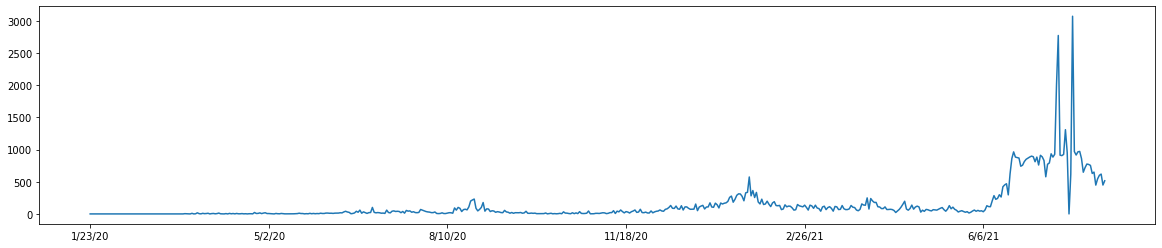

In [32]:
covid_confirmed_df.loc['Rwanda'].plot(figsize=(20, 4))

In [33]:
covid_confirmed_df.loc['Rwanda', covid_confirmed_df.loc['Rwanda'] > 2000]

7/18/21    2773.0
7/26/21    3072.0
Name: Rwanda, dtype: float64

In [34]:
covid_confirmed_df.loc['Rwanda', '7/18/21'] = 2773 / 2
covid_confirmed_df.loc['Rwanda', '7/26/21'] = 3072 / 2
covid_confirmed_df.loc['Rwanda', '7/25/21'] = 3072 / 2

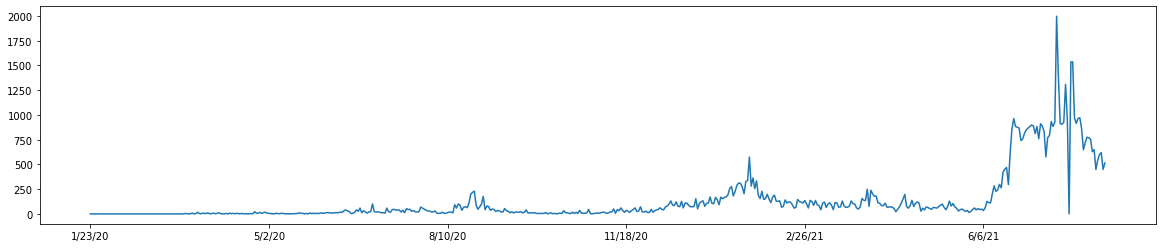

In [35]:
covid_confirmed_df.loc['Rwanda'].plot(figsize=(20, 4))

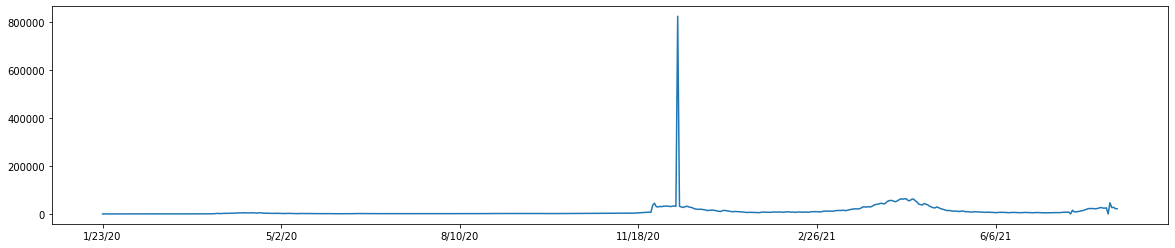

In [36]:
covid_confirmed_df.loc['Turkey'].plot(figsize=(20, 4))

In [37]:
covid_confirmed_df.loc['Turkey', covid_confirmed_df.loc['Turkey'] > 80000]

12/10/20    823225.0
Name: Turkey, dtype: float64

In [38]:
covid_confirmed_df.loc['Turkey', '12/10/20'] = covid_confirmed_df.loc['Turkey', '12/9/20']

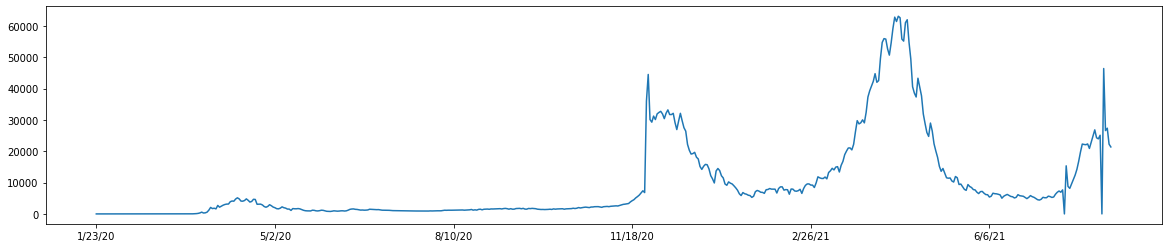

In [39]:
covid_confirmed_df.loc['Turkey'].plot(figsize=(20, 4))

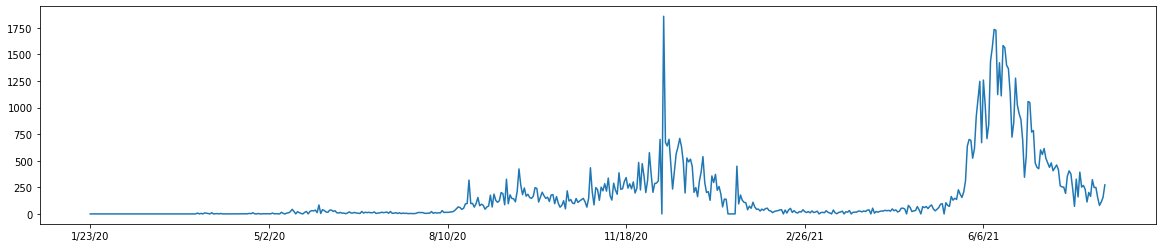

In [40]:
covid_confirmed_df.loc['Uganda'].plot(figsize=(20, 4))

In [41]:
covid_confirmed_df.loc['Uganda' , covid_confirmed_df.loc['Uganda'] > 1800]

12/9/20    1859.0
Name: Uganda, dtype: float64

In [42]:
covid_confirmed_df.loc['Uganda', '12/9/20'] = 1859 / 2
covid_confirmed_df.loc['Uganda', '12/8/20'] = 1859 / 2

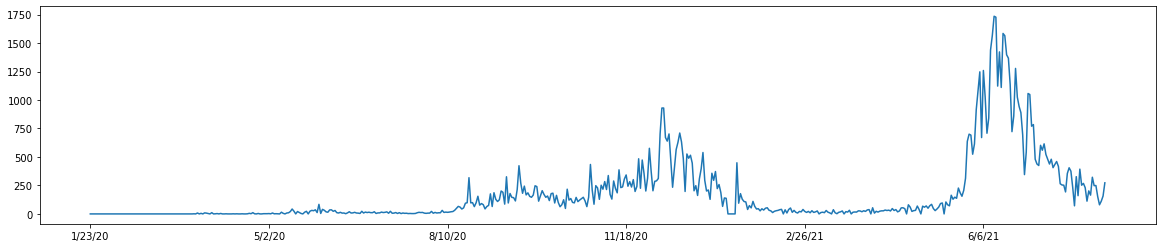

In [43]:
covid_confirmed_df.loc['Uganda'].plot(figsize=(20, 4))

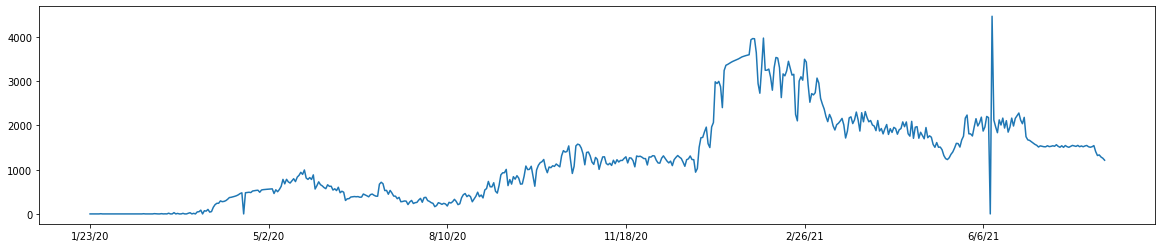

In [44]:
covid_confirmed_df.loc['United Arab Emirates'].plot(figsize=(20, 4))

In [45]:
covid_confirmed_df.loc['United Arab Emirates' , covid_confirmed_df.loc['United Arab Emirates'] > 4000]

6/11/21    4471.0
Name: United Arab Emirates, dtype: float64

In [46]:
covid_confirmed_df.loc['United Arab Emirates', '6/11/21'] = 4471 / 2
covid_confirmed_df.loc['United Arab Emirates', '6/10/21'] = 4471 / 2

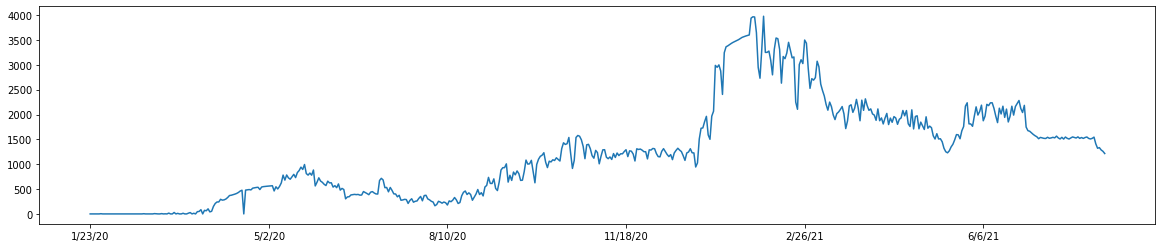

In [47]:
covid_confirmed_df.loc['United Arab Emirates'].plot(figsize=(20, 4))

In [48]:
covid_confirmed_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

## Let's smooth out data.

In [49]:
covid_confirmed_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

In [50]:
# Smoothing out data.
covid_confirmed_df = covid_confirmed_df.ewm(span=10, adjust=False, axis=1).mean() 

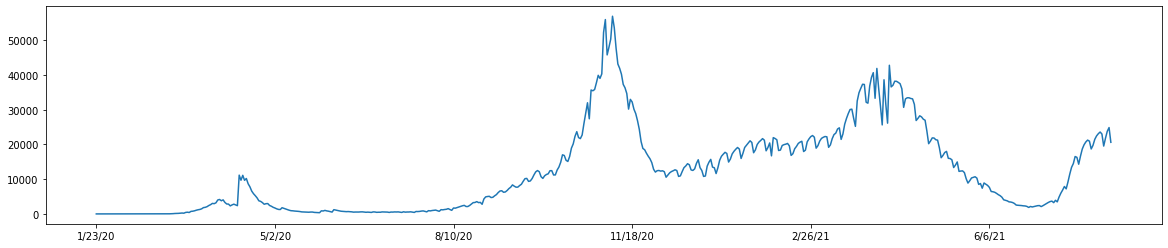

In [51]:
covid_confirmed_df.loc['France'].plot(figsize=(20, 4))

In [52]:
covid_confirmed_df

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.148760,0.121713,0.099583,0.081477,0.066663,0.054543,0.044626,...,1784.633180,1737.790783,1704.919732,1593.479781,1571.574366,1285.833572,1052.045650,1418.400986,1160.509898,1311.326280,1292.903320,1057.829989,865.497264,708.134125,1240.473375,1183.114580,968.002838,931.820504,808.944048,661.863312,541.524528,596.883705,619.813940,606.029588,576.569663,567.556997,464.364815,379.934849,576.673967,578.551428,538.996623,518.815419,506.121706,414.099578,338.808745,453.207155,413.533127,388.890740,367.637878,338.430991
Albania,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.308068,3.979328,5.619450,6.052277,7.679136,7.555657,7.090992,6.710812,7.490664,7.583271,8.568130,10.283016,11.686104,13.379540,12.946896,18.411097,19.245443,21.928090,23.577528,23.836159,23.502312,22.138255,23.749482,24.885939,28.906678,30.378191,33.036702,34.302756,32.611346,38.500192,49.500157,64.500128,79.863741,90.615788,107.231100,100.279991,122.047265,151.856853,174.064698,211.325662
Algeria,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.148760,0.121713,0.099583,0.081477,0.066663,0.418179,...,435.024678,443.383827,469.132222,496.562727,557.369504,603.847776,633.693635,678.112974,725.910615,760.108685,823.543470,891.444657,930.636538,961.248076,1000.475699,1054.571026,1084.830840,1107.225232,1151.366099,1179.299536,1198.881438,1254.539359,1307.168566,1419.865190,1441.162429,1455.678351,1409.736832,1366.511954,1364.964326,1354.425357,1379.984383,1363.441768,1334.270538,1298.948622,1248.230690,1201.643292,1161.162694,1103.496749,1057.588249,1021.663113
Andorra,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,...,3.058555,15.775181,18.361512,20.295783,21.151095,17.305441,14.158997,26.130089,23.560982,19.277167,28.863136,29.797112,24.379455,19.946827,31.956495,29.782587,24.367571,35.391649,35.138622,28.749781,23.522548,33.609358,29.134929,23.837669,32.049002,30.403729,24.875778,20.352910,29.197835,27.343683,28.008468,25.097838,25.443685,20.817561,17.032550,13.935722,18.129227,18.105732,17.904689,17.558382
Angola,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

## Renormalizing confirmed cases and deaths.

In [53]:
# Deletind non-relevant data.
covid_confirmed_df.drop(index='Diamond Princess', inplace=True)
covid_confirmed_df.drop(index='Summer Olympics 2020', inplace=True)
covid_confirmed_df.drop(index='Holy See', inplace=True)
covid_confirmed_df.drop(index='West Bank and Gaza', inplace=True)
covid_confirmed_df.drop(index='Palau', inplace=True)
covid_confirmed_df.drop(index='MS Zaandam', inplace=True)

In [54]:
# Let's take max covid cases for rescaling deaths dataset.
max_covid_confirmed_by_country_df = covid_confirmed_df.max(axis=1)

In [55]:
covid_confirmed_df = covid_confirmed_df.divide(covid_confirmed_df.max(axis=1), axis=0)

In [56]:
covid_confirmed_df

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000094,0.000077,0.000063,0.000052,0.000042,0.000035,0.000028,0.000023,...,0.926493,0.902175,0.885110,0.827256,0.815884,0.667541,0.546170,0.736364,0.602479,0.680776,0.671212,0.549173,0.449323,0.367628,0.643992,0.614215,0.502539,0.483755,0.419964,0.343607,0.281133,0.309873,0.321777,0.314621,0.299326,0.294648,0.241075,0.197243,0.299381,0.300355,0.279820,0.269343,0.262753,0.214980,0.175893,0.235283,0.214686,0.201893,0.190859,0.175697
Albania,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003058,0.003678,0.005195,0.005595,0.007098,0.006984,0.006555,0.006203,0.006924,0.007010,0.007920,0.009505,0.010802,0.012368,0.011968,0.017019,0.017790,0.020270,0.021795,0.022034,0.021725,0.020464,0.021954,0.023004,0.026721,0.028081,0.030539,0.031709,0.030145,0.035589,0.045757,0.059623,0.073825,0.083764,0.099123,0.092697,0.112819,0.140374,0.160903,0.195346
Algeria,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000125,0.000102,0.000084,0.000068,0.000056,0.000046,0.000287,...,0.298847,0.304589,0.322277,0.341121,0.382893,0.414822,0.435325,0.465840,0.498675,0.522168,0.565745,0.612391,0.639315,0.660344,0.687292,0.724453,0.745241,0.760625,0.790948,0.810137,0.823590,0.861825,0.897979,0.975398,0.990028,1.000000,0.968440,0.938746,0.937683,0.930443,0.948001,0.936637,0.916597,0.892332,0.857491,0.825487,0.797678,0.758064,0.726526,0.701847
Andorra,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,...,0.027324,0.140931,0.164037,0.181317,0.188958,0.154602,0.126493,0.233439,0.210488,0.172217,0.257856,0.266199,0.217800,0.178200,0.285491,0.266070,0.217693,0.316180,0.313919,0.256843,0.210144,0.300257,0.260284,0.212959,0.286317,0.271619,0.222234,0.181827,0.260846,0.244281,0.250220,0.224217,0.227307,0.185979,0.152164,0.124498,0.161962,0.161752,0.159956,0.156862
Angola,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.328278,0.

In [57]:
covid_confirmed_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

## Let's save the data

In [58]:
# Saving max covid cases to rescale deaths.
max_covid_confirmed_by_country_df.to_csv(r'/content/gdrive/MyDrive/Covid_Project/Data/Processed_Data/max_covid_confirmed_by_country.csv')

In [59]:
# Saving these processed data to CSV.
covid_confirmed_df.to_csv(r'/content/gdrive/MyDrive/Covid_Project/Data/Processed_Data/confirmed_cases_processed.csv')